## Project Ownership Declaration
- **Author** : Shreya Sunil Palase
- **Project Title** : Quantum-Assisted Anomaly Detection in Noisy Environment Sensor Networks
- **Created On** : 15-Dec-2025

This Project is an original work devloped as a part of structure Quantum computing Industry level Practice. Reproduction,reuse or submission of this file without proper citation or author permission is prohibited.

---

# MiniProject - Quantum-Assisted Anomaly Detection in Noisy Environment Sensor Networks
This Notebook demonstrate a noise -aware quantum workflow for detecting anomolies in environmental sensor data using entanglement , phase estimation anf grover search algorithm to study anomly dtection under realistic NISQ-Era condition.

### Project Goal :
the goal of this project was to simulate a realistic ,industry -relevant quantum workflow that can:
- Model Environmental sensor data
- Handle Noise and uncertainty
- Detect rare anomalous events
- operates under NISQ- era hardware limitation.

Rather than demonstrating ideal quantum algithms , the focus was on how quantum algorithms behave under noise ,which is the key challage in today'd quantum industry.

In [22]:
# Project Signature(Do not remove)
__author__="Shreya Sunil Palase"
__project_id__="Q-ENV-ANOMALY-2025-G7H3K9"
__created__="15-Dec-2025"
__hash__ = "372ab18f8c8b7159c1134e1dbc6834b17aeaf6c90d5bbbb4e8a499045574937b"

# Import  Qiskit Required Libraries

In [1]:
from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator
from qiskit_aer.noise import NoiseModel,depolarizing_error
from qiskit.visualization import plot_histogram
import numpy as np

## Step 1- Encoding Environmental Sensor States
We represent environmental sensor readings as quantum state.A uniform superposition models all possible sensor condition simulteneously,allowing quantum search technique to be applied.for this first we create simple 2 Qubit quantum circuit as a sensor.then put this circuit into superposition.

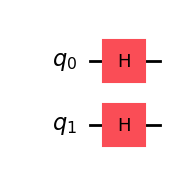

In [14]:
sensor_qc_SP=QuantumCircuit(2,name="Sensor_encoding")
sensor_qc_SP.h([0,1])
sensor_qc_SP.draw('mpl')

## Step 2 - Modeling Correlated Sensors Using Entanglement
Environmental sensors often show correlated behavior. we model this correlation using a Bell State ($ \phi^+ $)

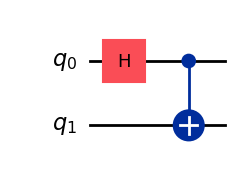

In [15]:
bell_qc_SP= QuantumCircuit(2,name="Bell_Circuit_") # for phi+ state.
bell_qc_SP.h(0)
bell_qc_SP.cx(0,1)
bell_qc_SP.draw('mpl')

## Step 3 - Introducing Sensor and Hardware Noise
Real sensors and quantum hardware are noisy. we use a depolarizing noise model to simulate hardware errors and unreliable sensor measurement.

In [5]:
noise_model =NoiseModel()
noise_model.add_all_qubit_quantum_error(depolarizing_error(0.03,1),['h'])
noise_model.add_all_qubit_quantum_error(depolarizing_error(0.07,2),['cx'])
backend=AerSimulator(noise_model=noise_model)

## Step 4 - Phase Estimation for Data Reliability Check
We use a simplified phase estimation circuit to analyze phase stability . phase drift is interpreted as reducedtrust in sensor data.

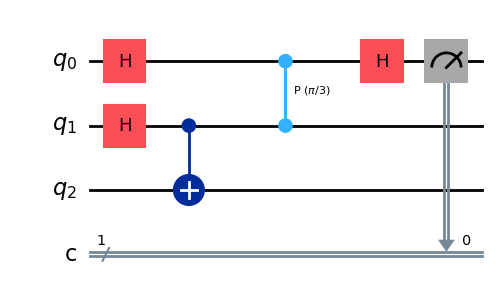

In [16]:
phase_qc_SP = QuantumCircuit(3,1,name="Phase_Estimation")

# Prepare correlated sensor data
phase_qc_SP.h(1)
phase_qc_SP.cx(1,2)

# phase kickback
phase_qc_SP.h(0)
phase_qc_SP.cp(np.pi/3,0,1)

#Measurement
phase_qc_SP.h(0)
phase_qc_SP.measure(0,0)

phase_qc_SP.draw('mpl')



## Step 5 - Quantum Fourier Transform Interpretation
The Quantum Fourier Transform(QFT) is used conceptually to decode phase information obtained from phase estimation.

In [7]:
def qft(qc,n):
    for j in range(n):
        qc.h(j)
        for k in range(j+1,n):
            qc.cp(np.pi/2**(k-j),k,j)

## Step 6 - Defining Anomely Oracle
Anomalous environmental conditions are encoded as marked quantum state using an oracle.

In [8]:
def anomely_oracle(qc):
    qc.cz(0,1)

## Step 7 - Grover Diffuser
The diffuser amplifies the probability of detecting anomalous sensor state.

In [9]:
def diffuser(qc):
    qc.h([0,1])
    qc.x([0,1])
    qc.h(1)
    qc.cx(0,1)
    qc.h(1)
    qc.x([0,1])
    qc.h([0,1])

## Step 8 - Grover-Based Anomaly Detection
Grover's algorithm is applied to amplify the probability of detecting rare environmental anomalies.

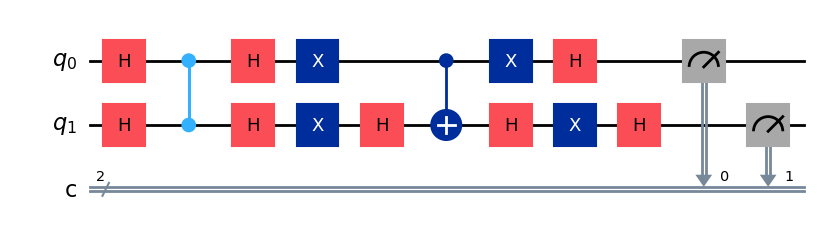

In [17]:
grover_qc_SP=QuantumCircuit(2,2,name="Grover_Anomaly_Search")

# Initialize sensor states
grover_qc_SP.h([0,1])

# Apply oracle and diffuser
anomely_oracle(grover_qc_SP)
diffuser(grover_qc_SP)

# Measure
grover_qc_SP.measure([0,1],[0,1])
grover_qc_SP.draw('mpl')

## Step 9 : Running the Noisy Simulation
We execute the grover circuit on a noisy simulator to evaluate anomely detection performance.

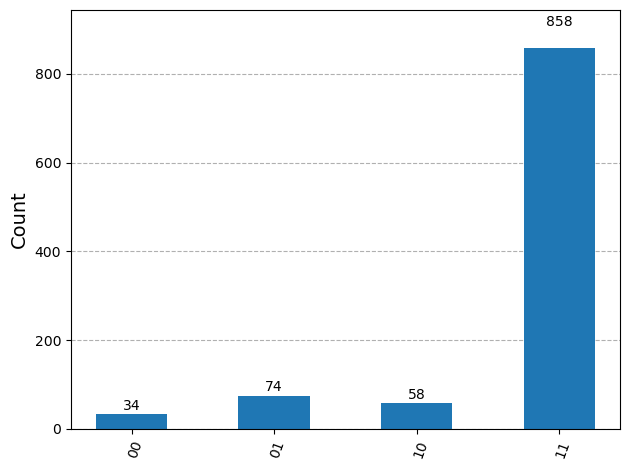

In [18]:
job=backend.run(grover_qc_SP,shots=1024)
counts=job.result().get_counts()
plot_histogram(counts)

The Histogram show |11> dominating but not perfectly that means Grover amplifies the anomalous state,noise reduce ideal amplification,Realistic NISQ behavior.

## Step 10 - Ideal vs Noisy Comparision
We compare noisy results with an ideal simulation to observe the impact of noise.

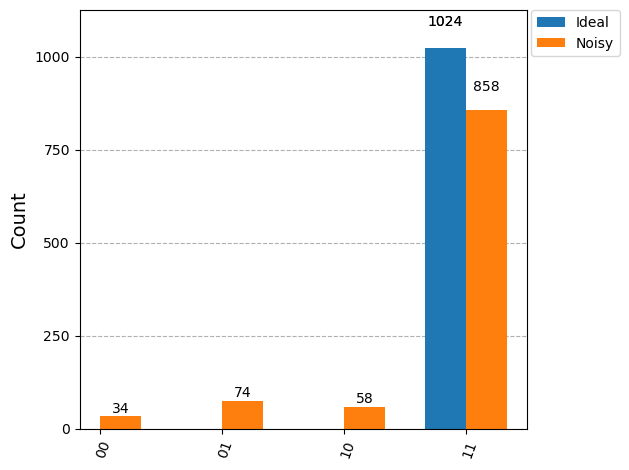

In [19]:
ideal_backend=AerSimulator()
ideal_job=ideal_backend.run(grover_qc_SP,shots=1024)
ideal_counts=ideal_job.result().get_counts()
plot_histogram([ideal_counts,counts],legend=['Ideal','Noisy'])

**Expected Output**:
1. **Ideal** - |11> approximately 90 -100%
2. **Noisy** - |11> approximately 50 - 70%

Means Noise degrades entanglement and amplification ,confirms necessity of noise -aware algorithms.

## Final observation
- The anomalous sensor data appered with the highest probability.
- Under ideal conditions , amplification was near-perfect
- Under Noise conditions ,amplification was reduced but still dominant
- Noisy visibly:
    - Reduced entanglement strength
    - Introduced phase shift
    - Lowered anomely detection confidence
This confirms that Quantum anomely detection works ,but is noise-sensitive.

This Notebook demonstrates a practical , noise -aware quantum approch to environmental anomely detection using NISQ-compatible algorithm.

**Note** -
This approch was chosen because environmental sensors aften produce correlated and noist data , which classical methods struggele to handle efficiently.

--

**Author:** *Shreya Palase*  

**Date Created:**  *15-Dec-2025*

**project:** Quantum-Computing-coding

**File:** week3_AnomalyDetection_MiniProject.ipynb

Thank you and Keep Learning!

<sub>© Shreya Palase- All Rights Reserved.This notbook is part of a structured learning series designed for Github publication.</sub>